In [85]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('bmh')
import tqdm
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

# Defining additional functions

In [305]:
def readCsvToDF(path):
    dataSeries = pd.read_csv(path)
    dataSeries = dataSeries.rename(columns={'Unnamed: 0': 'Time'})
    TimeIndex = dataSeries['Time']
    dataSeries.index = pd.to_datetime(TimeIndex)
    dataSeries = dataSeries[::-1]
    dataSeries = dataSeries.drop('Time', axis=1)
    return dataSeries

def base_plot(data, x=None):
    # Отрисовка
    plt.figure(figsize=(15,7))
    if x is None:
        plt.plot(data)
    else:
        plt.plot(x, data)
    plt.xlabel('Date')
    plt.ylabel('Values of Time Series')
    plt.grid(True)
    plt.show()
    
def finding_parametrs(data, n_diff, period, sesonal=False):
    diffSeries = np.diff(data, n_diff)
    adf = sm.tsa.stattools.adfuller(diffSeries, maxlag=period)
    print('ADF: ', adf)
    
    plt.figure(figsize=(17,7))
    ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
    ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=1)
    
    ax1.plot(np.arange(len(diffSeries)), diffSeries)
    sm.graphics.tsa.plot_acf(diffSeries, lags=period, ax=ax2)
    sm.graphics.tsa.plot_pacf(diffSeries, lags=period, ax=ax3)

In [231]:
def get_predict_plot(model, sensor, sensor_name):
    predict = model.predict(start=trainData.shape[0], end=trainData.shape[0]+24*10, dynamic=False)[1:]
    true = testingData[sensor_name]
    
    # Compute metrics
    r2 = r2_score(true.values, predict)
    mse = mean_squared_error(true.values, predict)
    
    print('R^2: %1.2f' % r2)
    print('MSE: %1.2f' % mse )
    
    # Plotting
    plt.figure(figsize=(14,5))
    plt.plot(sensor, label='Actual Train')
    plt.plot(testingData.index, predict, label='Prediction')
    plt.plot(true, label='Actual Test')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Values of Time Series')
    plt.axvspan(testingData.index[0], testingData.index[-1], alpha=0.2, color='red')
    plt.grid(True)

# Loading the DataSet

In [5]:
# testing days = 10
dataSet = readCsvToDF('Data/dataset.csv')
trainData = dataSet[:-24*10]
testingData = dataSet[-24*10:]
dataSet.head()

,sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,sensor 6,sensor 7,sensor 8,sensor 9
Time,,,,,,,,,
2019-12-11 10:00:00,541.854431,771.818909,728.981018,707.271729,660.441406,776.562866,0.0,1953.543945,2174.231445
2019-12-11 11:00:00,546.210815,770.051453,728.879578,706.880798,663.398987,772.937256,0.0,1942.814331,2164.085205
2019-12-11 12:00:00,554.211792,770.167908,728.721802,707.779419,665.061401,771.868408,0.0,1968.240601,2188.068848
2019-12-11 13:00:00,552.346313,768.941040,728.868286,708.314941,665.139282,771.105408,0.0,1952.284790,2171.464355
2019-12-11 14:00:00,553.290344,769.628296,729.002502,708.390503,665.938660,770.952454,0.0,1966.600708,2185.202637


# Designing models

## Sensor 1

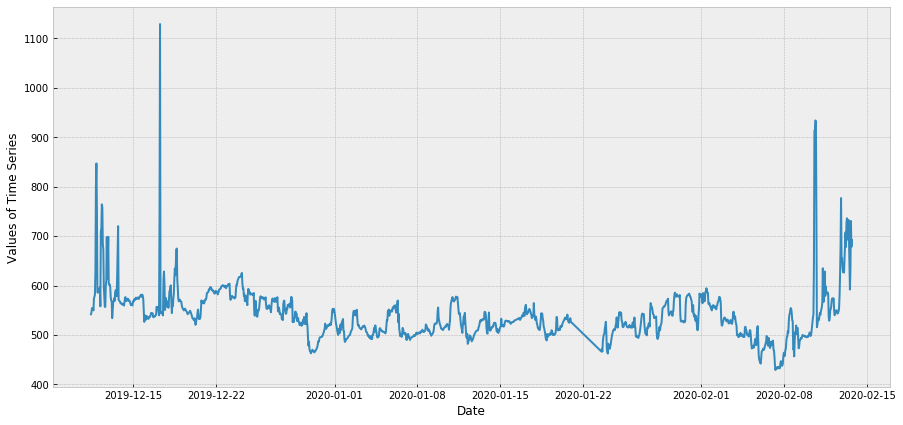

In [7]:
sensor_1 = trainData['sensor 1']
base_plot(sensor_1)

### Finding parametrs

ADF:  (-12.936372990895434, 3.610712982015249e-24, 18, 1457, {'1%': -3.434846127900848, '5%': -2.8635257411342616, '10%': -2.5678271914441395}, 13394.194430978225)


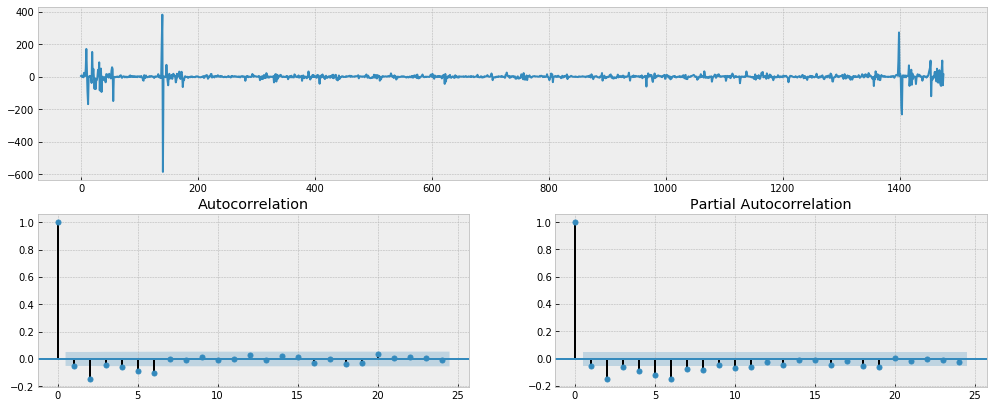

In [228]:
# ARIMA
finding_parametrs(sensor_1, 1, 24)

### Designing model

In [229]:
m = 24
p = 2 # PACF
P = 0 # PACF
d = 1
D = 1 
q = 2 # ACF
Q = 0 # ACF

In [230]:
model1 = sm.tsa.statespace.SARIMAX(sensor_1, 
                                order=(p,d,q), 
                                seasonal_order=(P, D, Q, m)).fit()
print(model1.summary())

                                      SARIMAX Results                                      
Dep. Variable:                            sensor 1   No. Observations:                 1477
Model:             SARIMAX(2, 1, 2)x(0, 1, [], 24)   Log Likelihood               -7192.837
Date:                             Thu, 07 May 2020   AIC                          14395.673
Time:                                     18:54:21   BIC                          14422.077
Sample:                                          0   HQIC                         14405.526
                                            - 1477                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1730      0.004    -43.079      0.000      -0.181      -0.165
ar.L2          0.7229      

R^2: -0.07
MSE: 39452.37


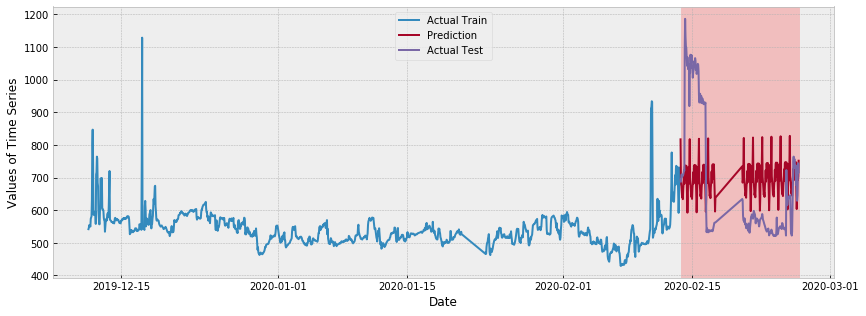

In [232]:
get_predict_plot(model1, sensor_1, 'sensor 1')

## Sensor 2

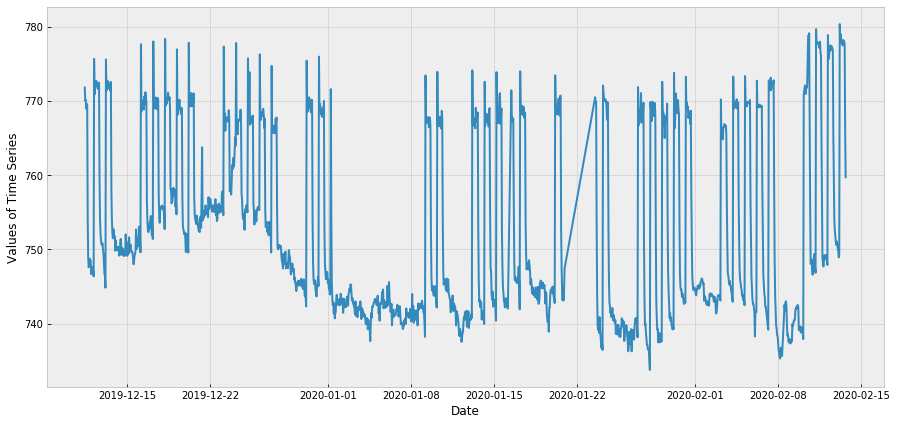

In [233]:
sensor_2 = trainData['sensor 2']
base_plot(sensor_2)

### Finding parametrs

ADF:  (-12.936372990895434, 3.610712982015249e-24, 18, 1457, {'1%': -3.434846127900848, '5%': -2.8635257411342616, '10%': -2.5678271914441395}, 13394.194430978225)


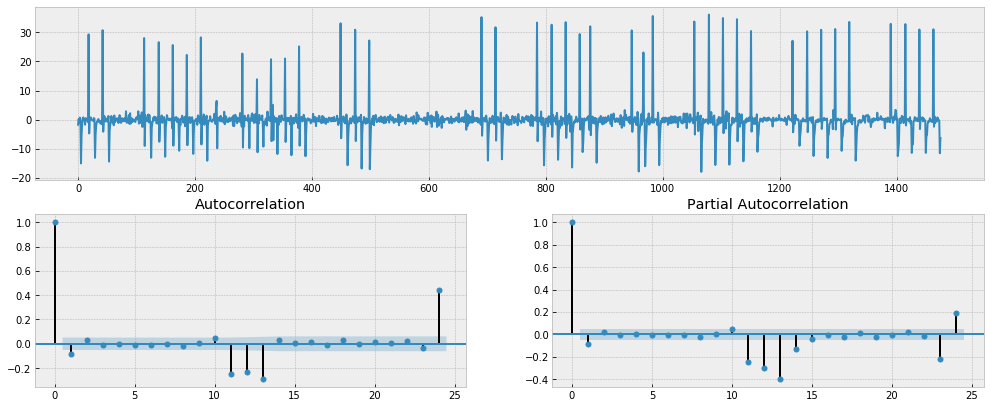

In [236]:
# ARIMA
finding_parametrs(sensor_2, 1, 24)

### Designing model

In [237]:
m2 = 24
p2 = 1 # PACF
P2 = 1 # PACF
d2 = 1
D2 = 1 
q2 = 1 # ACF
Q2 = 1 # ACF

In [238]:
model2 = sm.tsa.statespace.SARIMAX(sensor_2, 
                                order=(p2,d2,q2), 
                                seasonal_order=(P2, D2, Q2, m2)).fit()
print(model2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           sensor 2   No. Observations:                 1477
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood               -4342.720
Date:                            Thu, 07 May 2020   AIC                           8695.440
Time:                                    19:05:30   BIC                           8721.844
Sample:                                         0   HQIC                          8705.292
                                           - 1477                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2296      0.274     -0.837      0.402      -0.767       0.308
ma.L1          0.0358      0.276   

R^2: -3.69
MSE: 376.45


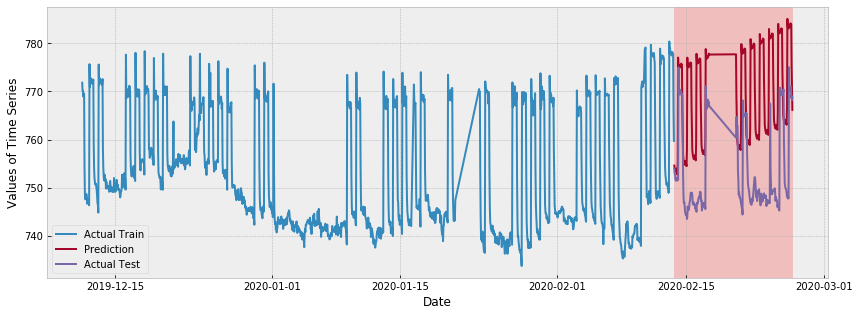

In [239]:
get_predict_plot(model2, sensor_2, 'sensor 2')

## Sensor 3

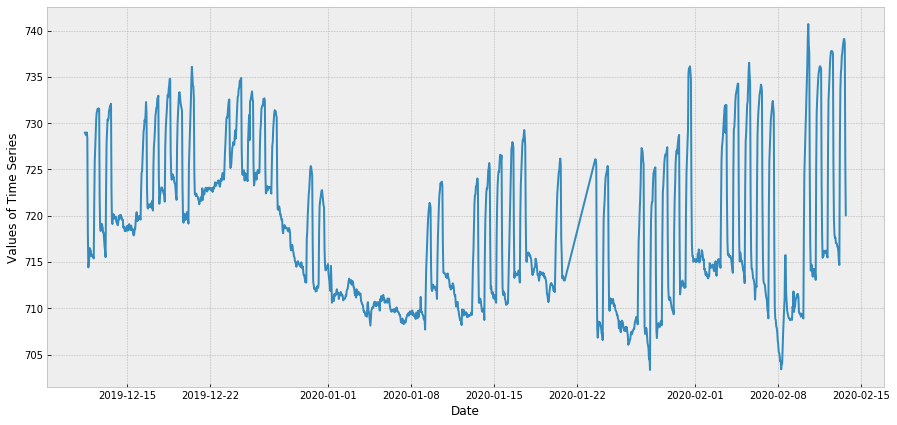

In [240]:
sensor_3 = trainData['sensor 3']
base_plot(sensor_3)

### Finding parametrs

ADF:  (-12.936372990895434, 3.610712982015249e-24, 18, 1457, {'1%': -3.434846127900848, '5%': -2.8635257411342616, '10%': -2.5678271914441395}, 13131.504123299039)


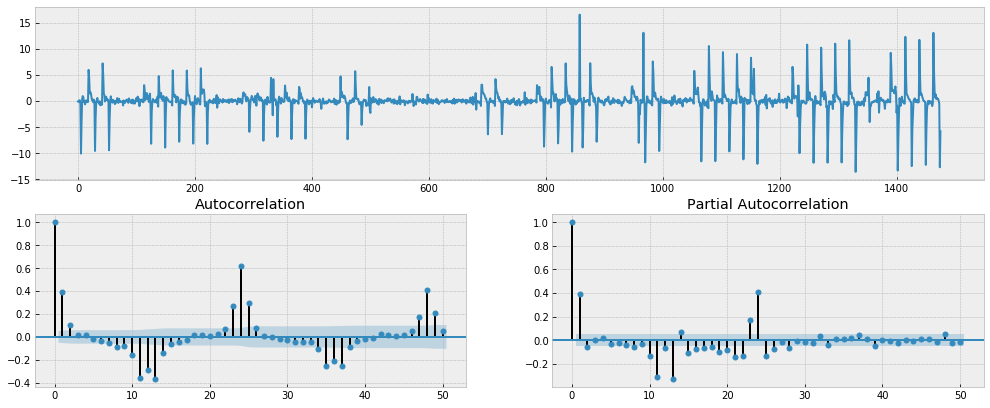

In [275]:
# ARIMA
finding_parametrs(sensor_3, 1, 50)

### Designing model

In [276]:
m3 = 24
p3 = 1 # PACF
P3 = 1 # PACF
d3 = 1
D3 = 1 
q3 = 1 # ACF
Q3 = 1 # ACF

In [277]:
model3 = sm.tsa.statespace.SARIMAX(sensor_3, 
                                order=(p3,d3,q3), 
                                seasonal_order=(P3, D3, Q3, m3)).fit()
print(model3.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           sensor 3   No. Observations:                 1477
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood               -2774.753
Date:                            Thu, 07 May 2020   AIC                           5559.506
Time:                                    19:14:49   BIC                           5585.909
Sample:                                         0   HQIC                          5569.358
                                           - 1477                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2785      0.108      2.583      0.010       0.067       0.490
ma.L1          0.0331      0.109   

R^2: -1.22
MSE: 83.50


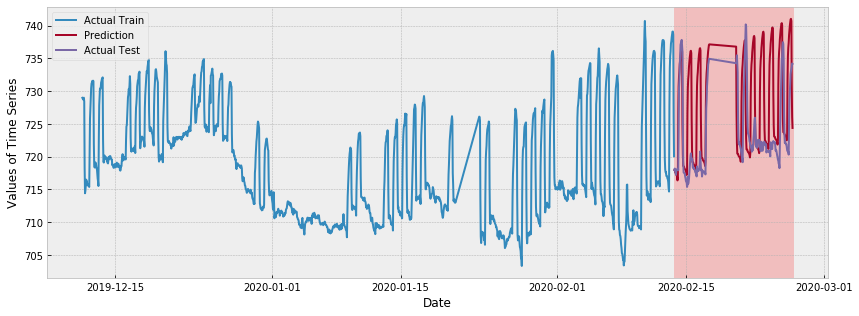

In [278]:
get_predict_plot(model3, sensor_3, 'sensor 3')

## Sensor 4

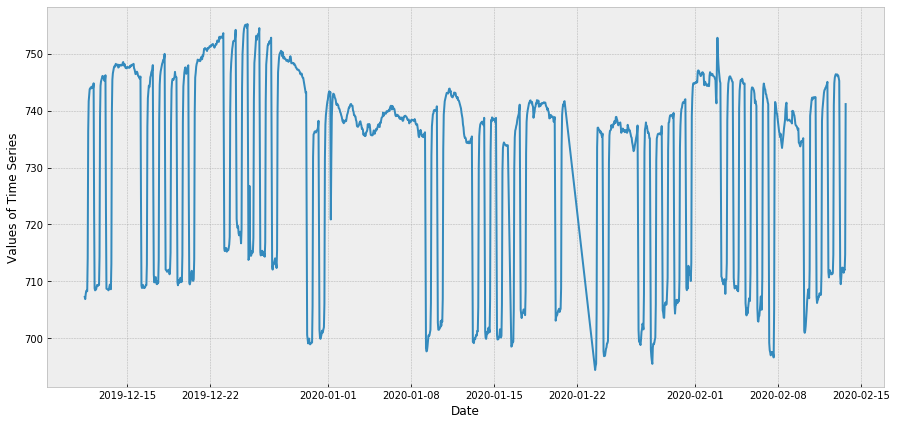

In [279]:
sensor_4 = trainData['sensor 4']
base_plot(sensor_4)

### Finding parametrs

ADF:  (-12.936372990895434, 3.610712982015249e-24, 18, 1457, {'1%': -3.434846127900848, '5%': -2.8635257411342616, '10%': -2.5678271914441395}, 13394.194430978225)


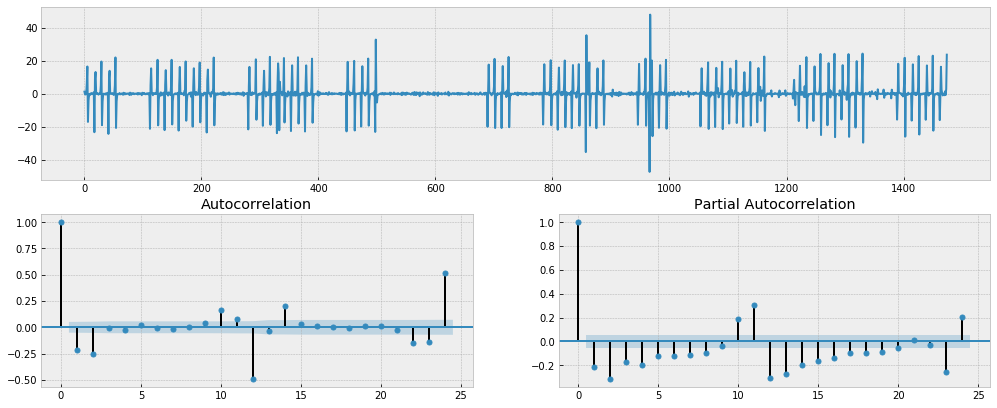

In [281]:
# ARIMA
finding_parametrs(sensor_4, 2, 24)

### Designing model

In [282]:
m4 = 24
p4 = 2 # PACF
P4 = 2 # PACF
d4 = 2
D4 = 2 
q4 = 2 # ACF
Q4 = 2 # ACF

In [283]:
model4 = sm.tsa.statespace.SARIMAX(sensor_4, 
                                order=(p4,d4,q4), 
                                seasonal_order=(P4, D4, Q4, m4)).fit()
print(model4.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           sensor 4   No. Observations:                 1477
Model:             SARIMAX(2, 2, 2)x(2, 2, 2, 24)   Log Likelihood               -4253.230
Date:                            Thu, 07 May 2020   AIC                           8524.459
Time:                                    19:26:45   BIC                           8571.829
Sample:                                         0   HQIC                          8542.150
                                           - 1477                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6677      0.020    -32.628      0.000      -0.708      -0.628
ar.L2          0.3153      0.020   

R^2: -0.54
MSE: 399.43


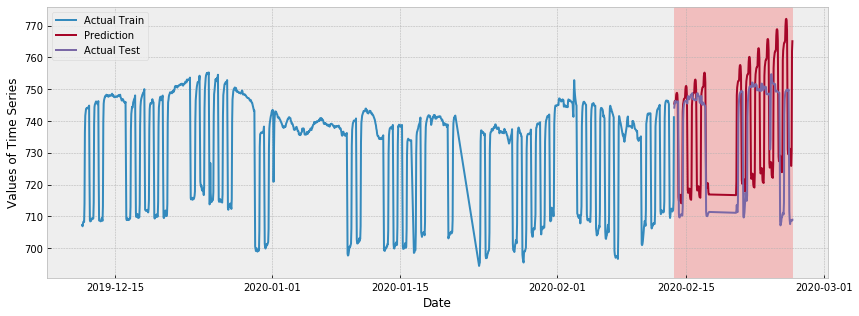

In [284]:
get_predict_plot(model4, sensor_4, 'sensor 4')

## Sensor 5

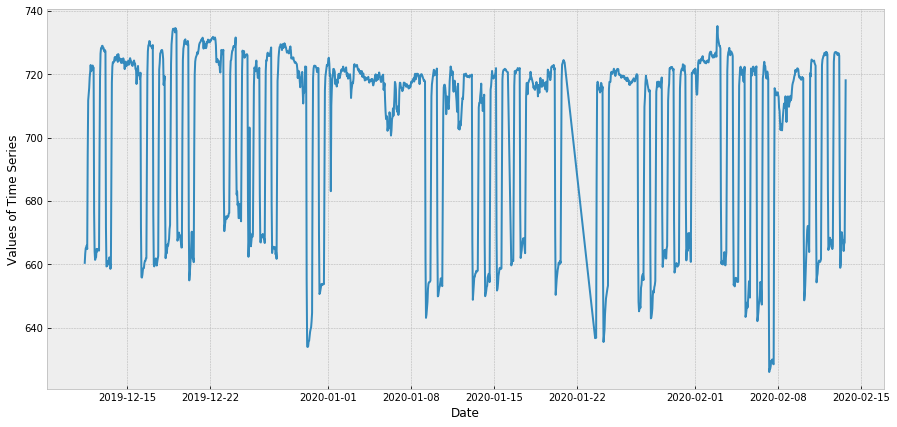

In [285]:
sensor_5 = trainData['sensor 5']
base_plot(sensor_5)

### Finding parametrs

ADF:  (-12.936372990895434, 3.610712982015249e-24, 18, 1457, {'1%': -3.434846127900848, '5%': -2.8635257411342616, '10%': -2.5678271914441395}, 13394.194430978225)


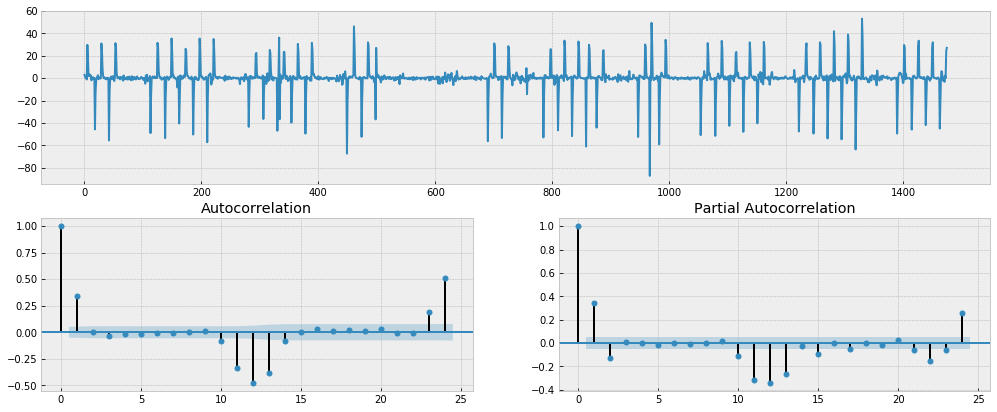

In [288]:
# ARIMA
finding_parametrs(sensor_5, 1, 24)

### Designing model

In [289]:
m5 = 24
p5 = 2 # PACF
P5 = 2 # PACF
d5 = 1
D5 = 1 
q5 = 1 # ACF
Q5 = 2 # ACF

In [290]:
model5 = sm.tsa.statespace.SARIMAX(sensor_5, 
                                order=(p5,d5,q5), 
                                seasonal_order=(P5, D5, Q5, m5)).fit()
print(model5.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                sensor 5   No. Observations:                 1477
Model:             SARIMAX(2, 1, 1)x(2, 1, [1, 2], 24)   Log Likelihood               -5182.845
Date:                                 Thu, 07 May 2020   AIC                          10381.690
Time:                                         19:39:21   BIC                          10423.935
Sample:                                              0   HQIC                         10397.454
                                                - 1477                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1986      0.017     69.736      0.000       1.165       1

R^2: -0.71
MSE: 1162.61


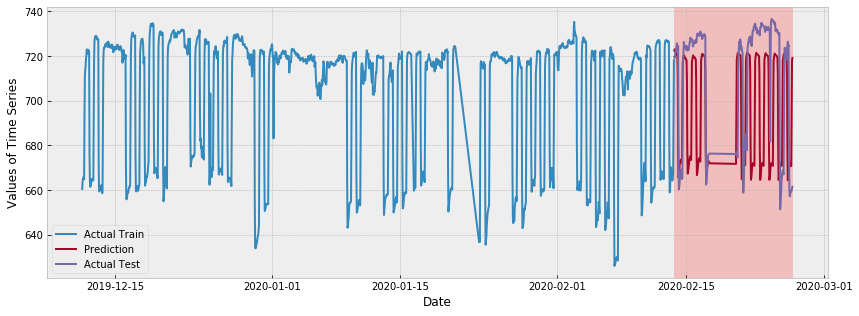

In [291]:
get_predict_plot(model5, sensor_5, 'sensor 5')

## Sensor 6

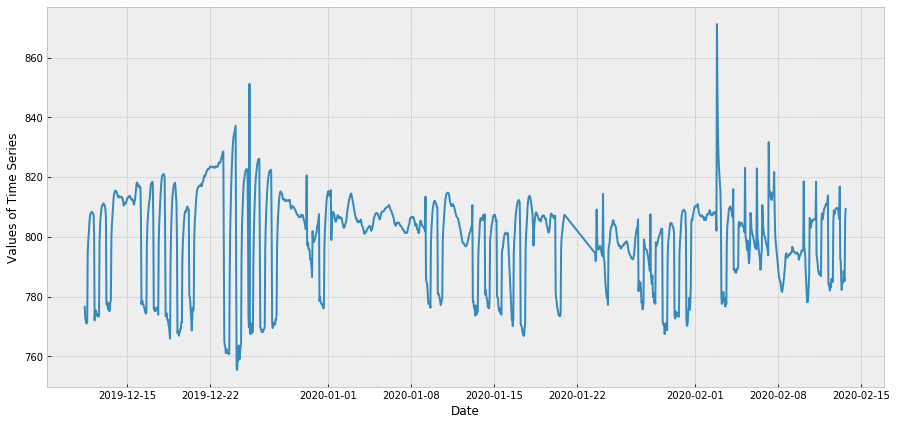

In [292]:
sensor_6 = trainData['sensor 6']
base_plot(sensor_6)

### Finding parametrs

ADF:  (-12.936372990895434, 3.610712982015249e-24, 18, 1457, {'1%': -3.434846127900848, '5%': -2.8635257411342616, '10%': -2.5678271914441395}, 13394.194430978225)


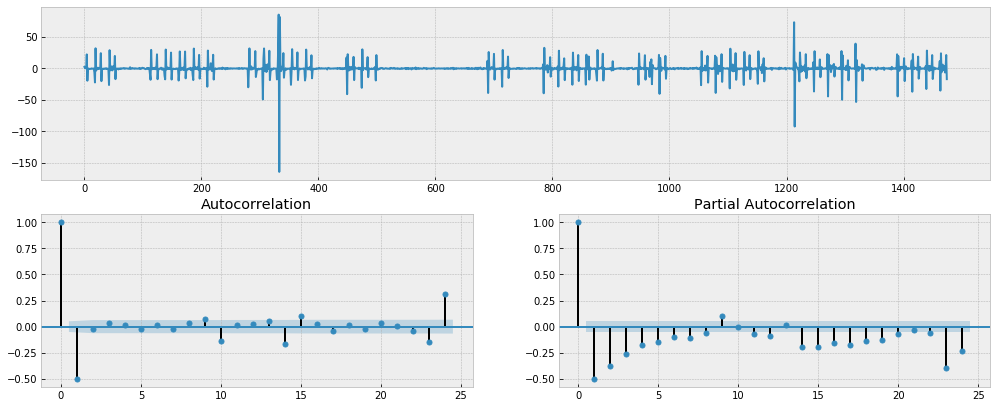

In [294]:
# ARIMA
finding_parametrs(sensor_6, 2, 24)

### Designing model

In [295]:
m6 = 24
p6 = 2 # PACF
P6 = 2 # PACF
d6 = 2
D6 = 2 
q6 = 1 # ACF
Q6 = 2 # ACF

In [296]:
model6 = sm.tsa.statespace.SARIMAX(sensor_6, 
                                order=(p6,d6,q6), 
                                seasonal_order=(P6, D6, Q6, m6)).fit()
print(model1.summary())

                                      SARIMAX Results                                      
Dep. Variable:                            sensor 1   No. Observations:                 1477
Model:             SARIMAX(2, 1, 2)x(0, 1, [], 24)   Log Likelihood               -7192.837
Date:                             Thu, 07 May 2020   AIC                          14395.673
Time:                                     19:48:44   BIC                          14422.077
Sample:                                          0   HQIC                         14405.526
                                            - 1477                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1730      0.004    -43.079      0.000      -0.181      -0.165
ar.L2          0.7229      

R^2: -0.11
MSE: 273.06


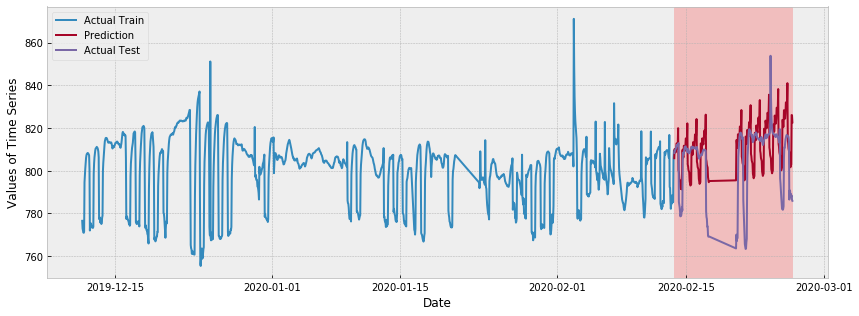

In [297]:
get_predict_plot(model6, sensor_6, 'sensor 6')

## Sensor 8

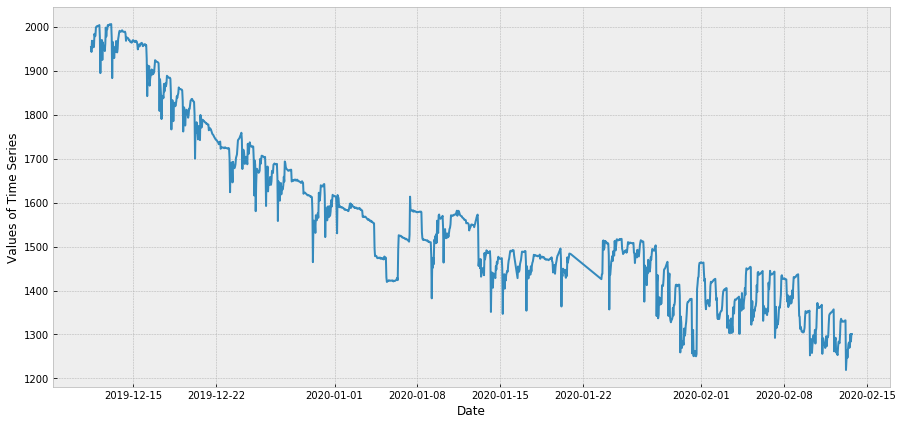

In [298]:
sensor_8 = trainData['sensor 8']
base_plot(sensor_8)

### Finding parametrs

ADF:  (-21.363823477542056, 0.0, 24, 1450, {'1%': -3.4348678719530934, '5%': -2.863535337271721, '10%': -2.5678323015457787}, 12936.90260846568)


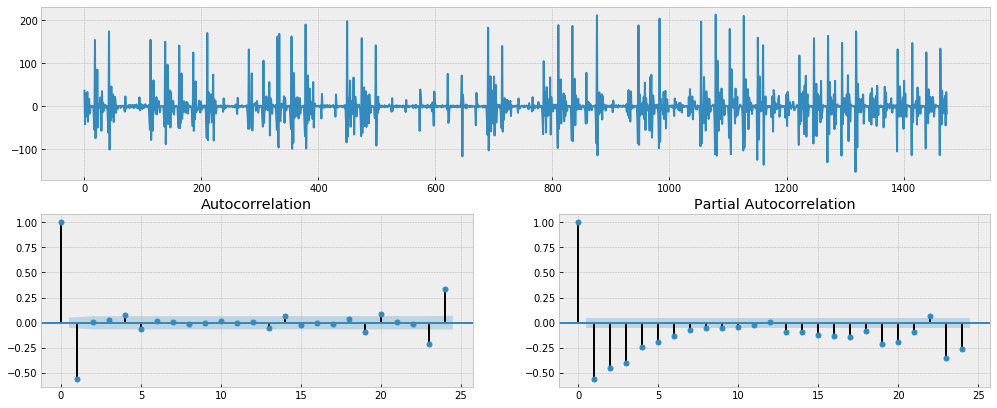

In [308]:
# ARIMA
finding_parametrs(sensor_8, 2, 24)

### Designing model

In [309]:
m8 = 24
p8 = 1 # PACF
P8 = 2 # PACF
d8 = 2
D8 = 2 
q8 = 1 # ACF
Q8 = 1 # ACF

In [310]:
model8 = sm.tsa.statespace.SARIMAX(sensor_8, 
                                order=(p8,d8,q8), 
                                seasonal_order=(P8, D8, Q8, m8)).fit()
print(model8.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           sensor 8   No. Observations:                 1477
Model:             SARIMAX(1, 2, 1)x(2, 2, 1, 24)   Log Likelihood               -6559.867
Date:                            Thu, 07 May 2020   AIC                          13131.735
Time:                                    20:15:55   BIC                          13163.315
Sample:                                         0   HQIC                         13143.529
                                           - 1477                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3600      0.016    -22.158      0.000      -0.392      -0.328
ma.L1         -0.9983      0.023   

R^2: -0.73
MSE: 44373.06


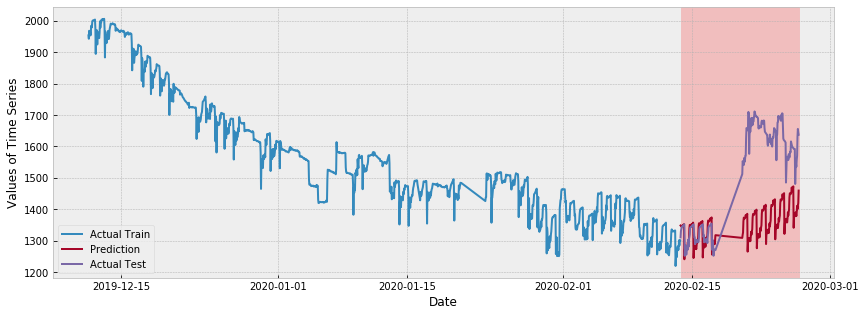

In [311]:
get_predict_plot(model8, sensor_8, 'sensor 8')

## Sensor 9

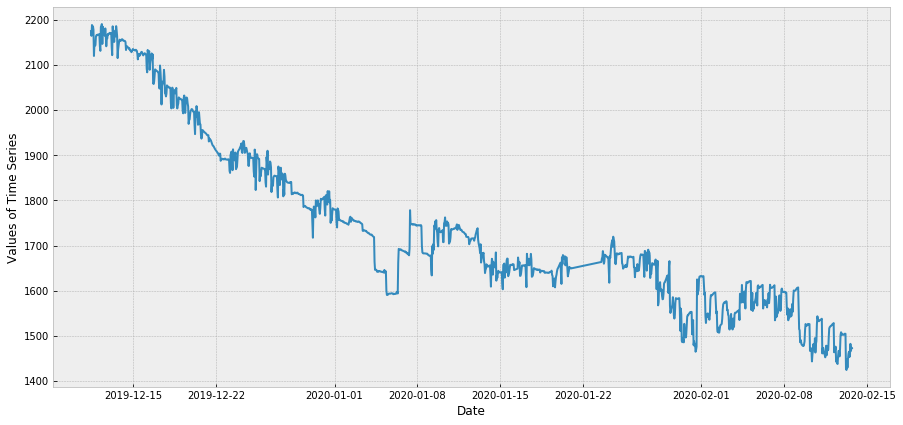

In [312]:
sensor_9 = trainData['sensor 9']
base_plot(sensor_9)

### Finding parametrs

ADF:  (-20.465480363994455, 0.0, 24, 1450, {'1%': -3.4348678719530934, '5%': -2.863535337271721, '10%': -2.5678323015457787}, 12022.858901518422)


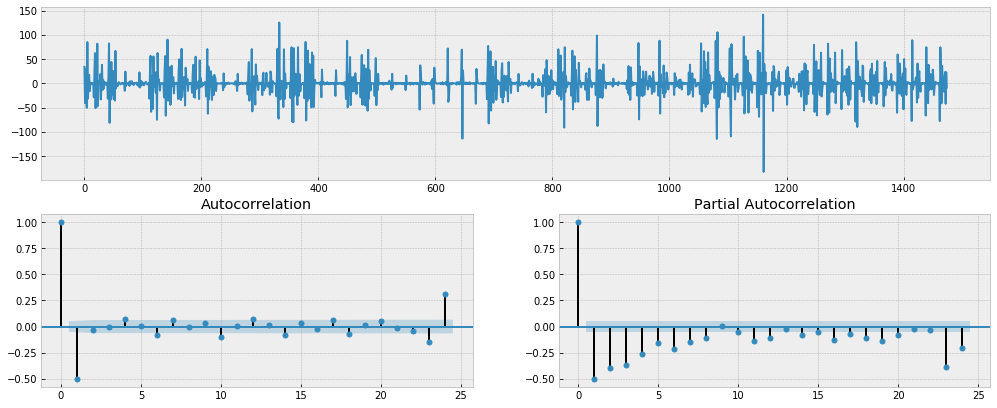

In [314]:
# ARIMA
finding_parametrs(sensor_9, 2, 24)

### Designing model

In [315]:
m9 = 24
p9 = 1 # PACF
P9 = 3 # PACF
d9 = 2
D9 = 2 
q9 = 1 # ACF
Q9 = 1 # ACF

In [316]:
model9 = sm.tsa.statespace.SARIMAX(sensor_9, 
                                order=(p9,d9,q9), 
                                seasonal_order=(P9, D9, Q9, m9)).fit()
print(model9.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           sensor 9   No. Observations:                 1477
Model:             SARIMAX(1, 2, 1)x(3, 2, 1, 24)   Log Likelihood               -6047.365
Date:                            Thu, 07 May 2020   AIC                          12108.729
Time:                                    20:25:04   BIC                          12145.572
Sample:                                         0   HQIC                         12122.489
                                           - 1477                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2343      0.018    -12.779      0.000      -0.270      -0.198
ma.L1         -0.9999      0.283   

R^2: -1.14
MSE: 51947.79


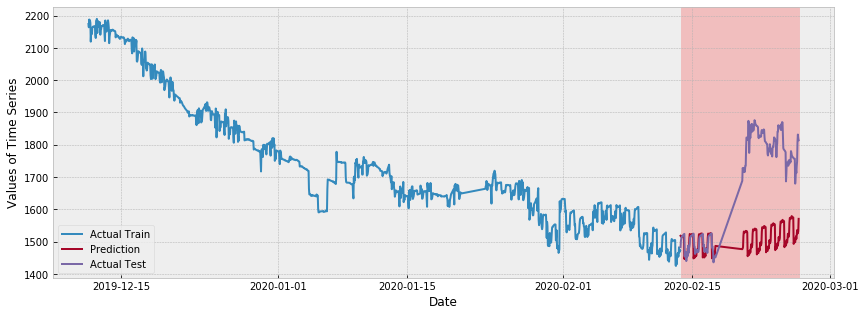

In [317]:
get_predict_plot(model9, sensor_9, 'sensor 9')